In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
pd.set_option("display.max_rows", 10)
sns.set()  
%matplotlib inline

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/main/dataset/Bachelor's%20Degree%20Majors%20by%20Age%2C%20Sex%2C%20and%20State/Bachelor_Degree_Majors.csv")
df

,State,Sex,Age Group,Bachelor's Degree Holders,Science and Engineering,Science and Engineering Related Fields,Business,Education,"Arts, Humanities and Others"
0,Alabama,Total,25 and older,"885,357","263,555","98,445","210,147","141,071","172,139"
1,Alabama,Total,25 to 39,"268,924","90,736","32,378","58,515","29,342","57,953"
2,Alabama,Total,40 to 64,"418,480","115,762","46,724","112,271","63,875","79,848"
3,Alabama,Total,65 and older,"197,953","57,057","19,343","39,361","47,854","34,338"
4,Alabama,Male,25 and older,"405,618","159,366","26,004","113,909","29,490","76,849"
...,...,...,...,...,...,...,...,...,...
607,Wyoming,Male,65 and older,"16,482","9,375","1,145","2,011","2,378","1,573"
608,Wyoming,Female,25 and older,"59,074","15,570","8,470","6,856","16,638","11,540"
609,Wyoming,Female,25 to 39,"18,180","6,708","2,268","1,936","3,313","3,955"
610,Wyoming,Female,40 to 64,"26,537","5,110","4,194","3,827","8,007","5,399"


In [4]:
df.head()

,State,Sex,Age Group,Bachelor's Degree Holders,Science and Engineering,Science and Engineering Related Fields,Business,Education,"Arts, Humanities and Others"
0,Alabama,Total,25 and older,"885,357","263,555","98,445","210,147","141,071","172,139"
1,Alabama,Total,25 to 39,"268,924","90,736","32,378","58,515","29,342","57,953"
2,Alabama,Total,40 to 64,"418,480","115,762","46,724","112,271","63,875","79,848"
3,Alabama,Total,65 and older,"197,953","57,057","19,343","39,361","47,854","34,338"
4,Alabama,Male,25 and older,"405,618","159,366","26,004","113,909","29,490","76,849"


In [5]:
df.tail()

,State,Sex,Age Group,Bachelor's Degree Holders,Science and Engineering,Science and Engineering Related Fields,Business,Education,"Arts, Humanities and Others"
607,Wyoming,Male,65 and older,"16,482","9,375","1,145","2,011","2,378","1,573"
608,Wyoming,Female,25 and older,"59,074","15,570","8,470","6,856","16,638","11,540"
609,Wyoming,Female,25 to 39,"18,180","6,708","2,268","1,936","3,313","3,955"
610,Wyoming,Female,40 to 64,"26,537","5,110","4,194","3,827","8,007","5,399"
611,Wyoming,Female,65 and older,"14,357","3,752","2,008","1,093","5,318","2,186"


In [6]:
df.describe()

,State,Sex,Age Group,Bachelor's Degree Holders,Science and Engineering,Science and Engineering Related Fields,Business,Education,"Arts, Humanities and Others"
count,612,612,612,612,612,612,612,612,612
unique,51,3,4,612,612,608,611,608,611
top,Alabama,Total,25 and older,"885,357","263,555","39,091","25,810","8,260","33,222"
freq,12,204,153,1,1,2,2,2,2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   State                                   612 non-null    object
 1   Sex                                     612 non-null    object
 2   Age Group                               612 non-null    object
 3   Bachelor's Degree Holders               612 non-null    object
 4   Science and Engineering                 612 non-null    object
 5   Science and Engineering Related Fields  612 non-null    object
 6   Business                                612 non-null    object
 7   Education                               612 non-null    object
 8   Arts, Humanities and Others             612 non-null    object
dtypes: object(9)
memory usage: 43.2+ KB


In [8]:
df[df.duplicated()].sum()

State                                     0.0
Sex                                       0.0
Age Group                                 0.0
Bachelor's Degree Holders                 0.0
Science and Engineering                   0.0
Science and Engineering Related Fields    0.0
Business                                  0.0
Education                                 0.0
Arts, Humanities and Others               0.0
dtype: float64

In [9]:
df = df[df["Age Group"] != "25 and older"]

In [10]:
df = df[df["Sex"] != "Total"]

In [11]:
def convert(string):
    return int(string.replace(',', ''))


for col in df.iloc[:,3:]:
    df[col] = df[col].apply(convert)

In [12]:
df['STEM'] = df['Science and Engineering'] + df['Science and Engineering Related Fields']
df = df.drop(['Science and Engineering', 'Science and Engineering Related Fields'], axis = 1)

In [13]:
df.reset_index(drop=True, inplace=True)

df = df[['State', 'Sex', 'Age Group', "Bachelor's Degree Holders", 'STEM', 'Business', 'Education', 'Arts, Humanities and Others']]

df.rename(columns={"Bachelor's Degree Holders": 'Bachelors Degree Holders'}, inplace=True)

In [14]:
df

,State,Sex,Age Group,Bachelors Degree Holders,STEM,Business,Education,"Arts, Humanities and Others"
0,Alabama,Male,25 to 39,117794,57900,29859,6357,23678
1,Alabama,Male,40 to 64,184328,80308,54931,12820,36269
2,Alabama,Male,65 and older,103496,47162,29119,10313,16902
3,Alabama,Female,25 to 39,151130,65214,28656,22985,34275
4,Alabama,Female,40 to 64,234152,82178,57340,51055,43579
...,...,...,...,...,...,...,...,...
301,Wyoming,Male,40 to 64,24149,12375,5077,2700,3997
302,Wyoming,Male,65 and older,16482,10520,2011,2378,1573
303,Wyoming,Female,25 to 39,18180,8976,1936,3313,3955
304,Wyoming,Female,40 to 64,26537,9304,3827,8007,5399


<AxesSubplot:xlabel='Bachelors Degree Holders', ylabel='State'>

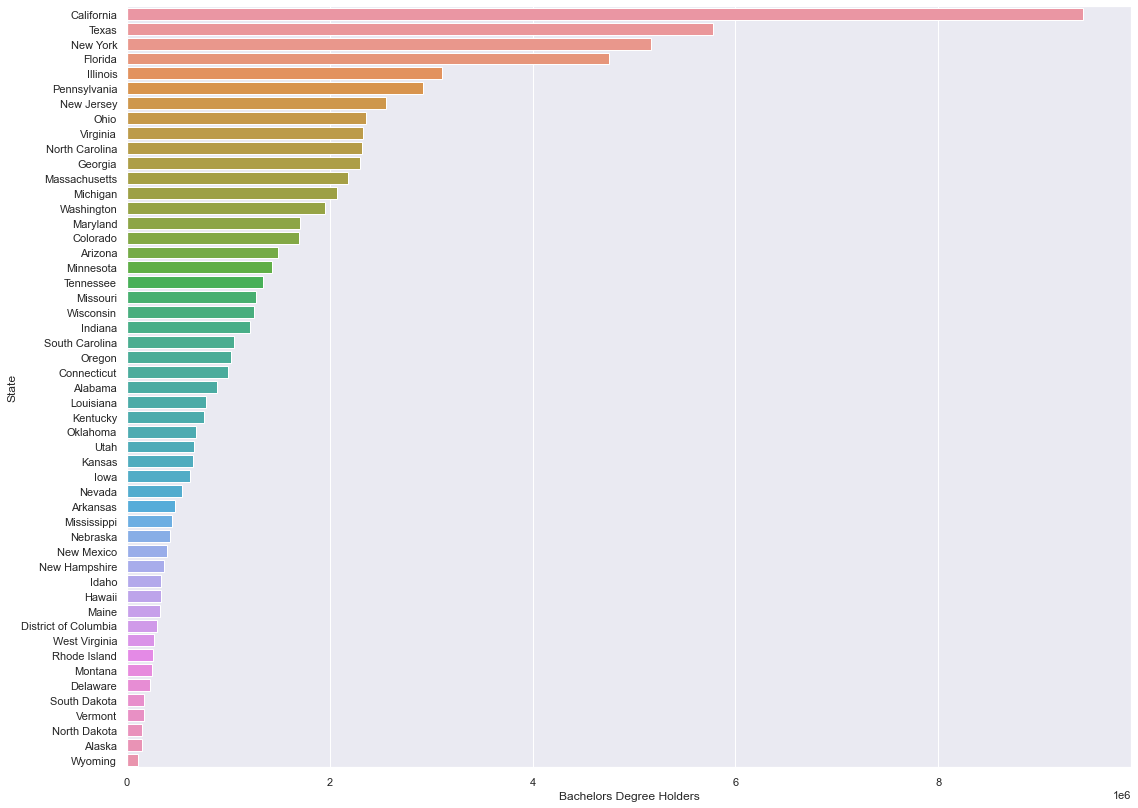

In [15]:
d1 = df.groupby(['State']).sum().reset_index()
d1.sort_values(by='Bachelors Degree Holders', ascending=False, inplace=True)
plt.figure(figsize=(18,14))
sns.barplot(x="Bachelors Degree Holders", y="State", data=d1)

In [16]:
d1.style.background_gradient(cmap='Blues')

ImportError: Missing optional dependency 'Jinja2'. DataFrame.style requires jinja2. Use pip or conda to install Jinja2.

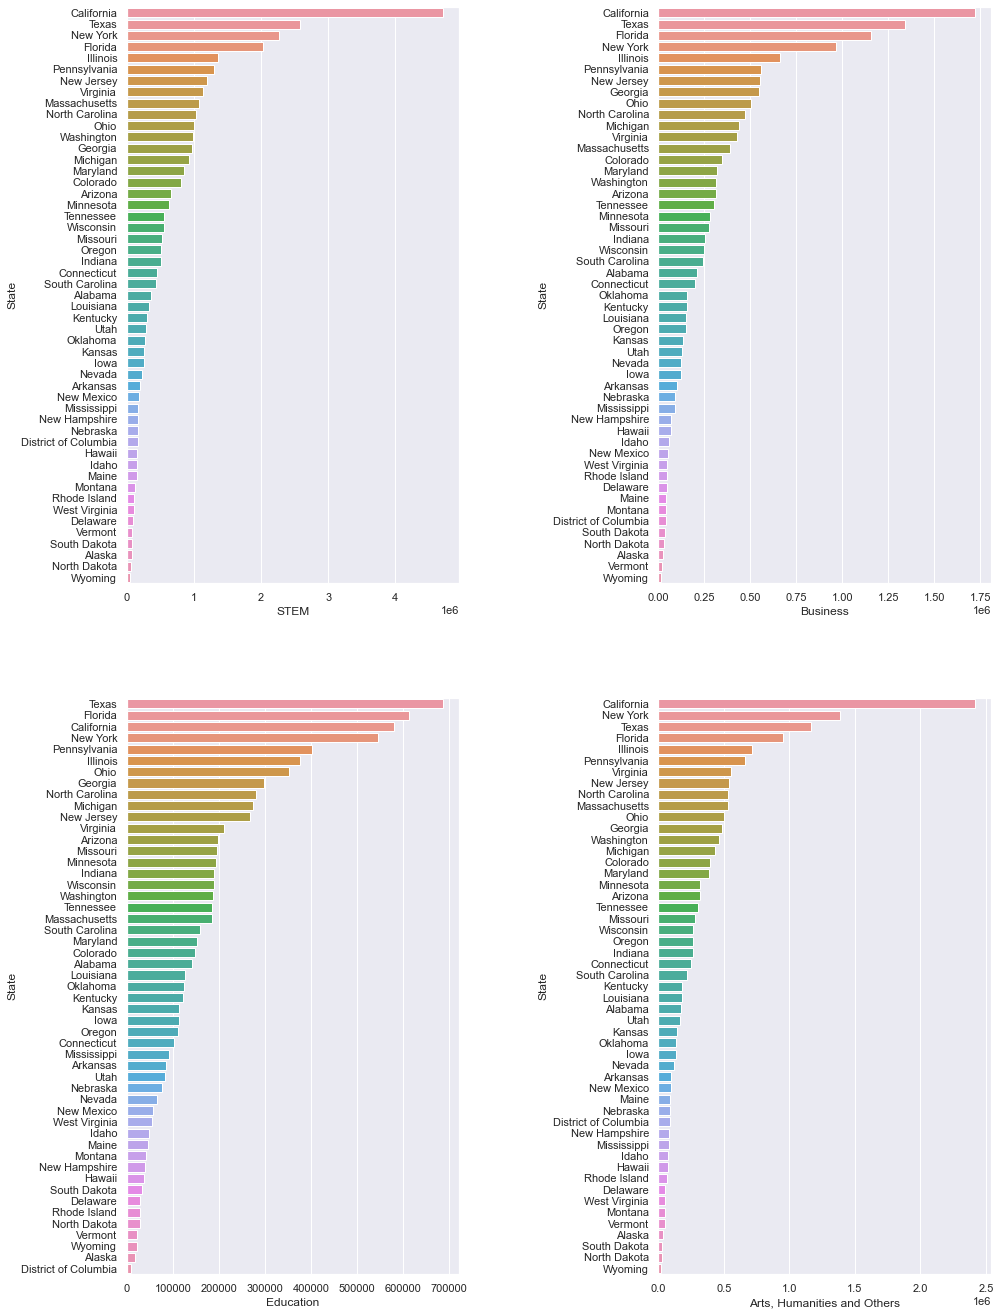

In [ ]:
d2 = df.groupby(['State']).sum().reset_index()
columns = d2.columns[2:]

i=1
plt.figure(figsize=(15,22))

for col in columns:
        plt.subplot(2,2,i)
        sns.barplot(x=col, y='State', data=d2.sort_values(by=col, ascending=False))
        i+=1

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.6, hspace=0.2)

<AxesSubplot:xlabel='Bachelors Degree Holders', ylabel='State'>

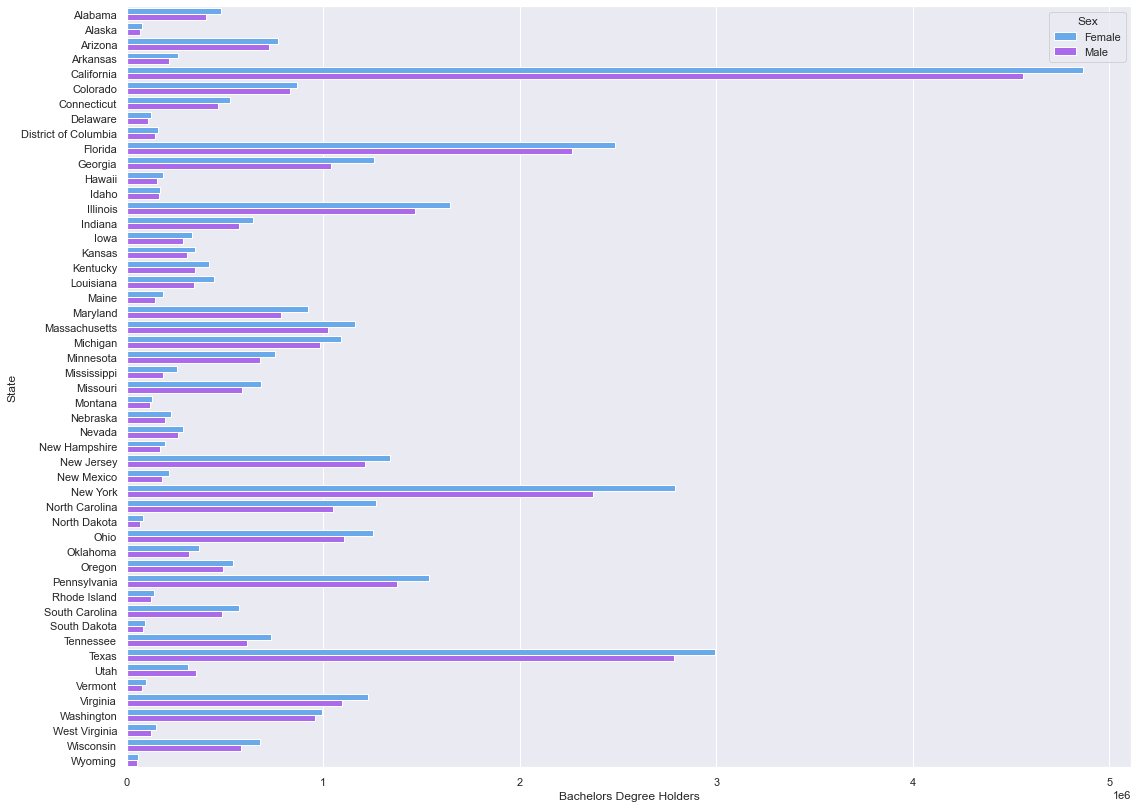

In [ ]:
d3 = df.groupby(['State', 'Sex']).sum().reset_index()
plt.figure(figsize=(18,14))
sns.barplot(x = "Bachelors Degree Holders", y = "State", hue = "Sex", data = d3, palette="cool")

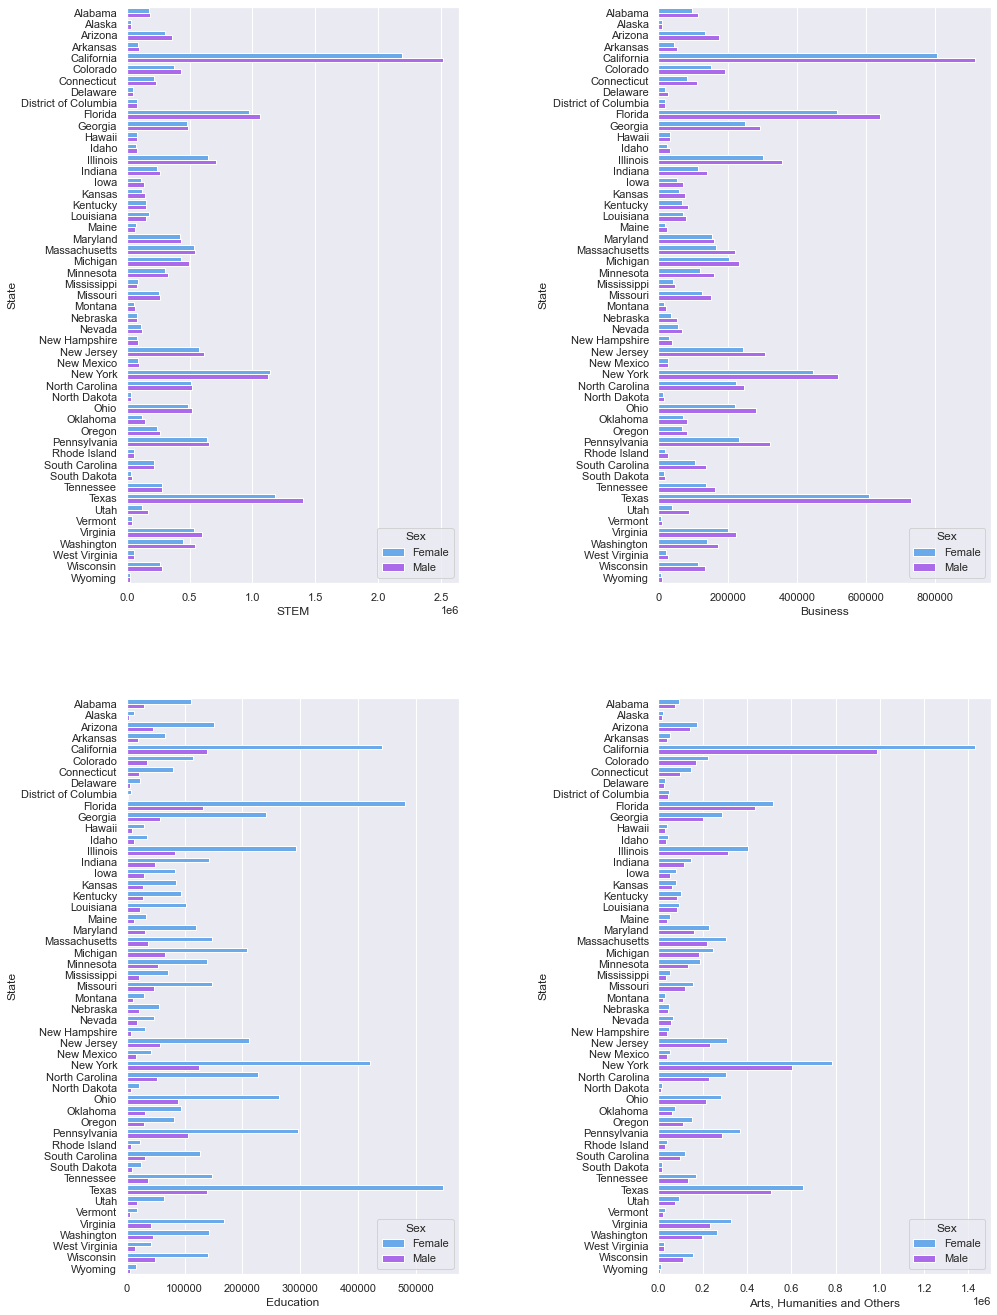

In [ ]:
d4 = df.groupby(['State', 'Sex']).sum().reset_index()
columns = d4.columns[3:]

i=1
plt.figure(figsize=(15,22))

for col in columns:
        plt.subplot(2,2,i)
        sns.barplot(x = col, y = "State", hue = "Sex", data = d4, palette="cool")
        i+=1

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.6, hspace=0.2)

In [ ]:
d5 = df.groupby(['Sex']).sum().reset_index()
d5

,Sex,Bachelors Degree Holders,STEM,Business,Education,"Arts, Humanities and Others"
0,Female,39399237,16147258,6818217,6747338,9686424
1,Male,35102414,17536718,8262491,2002639,7300566


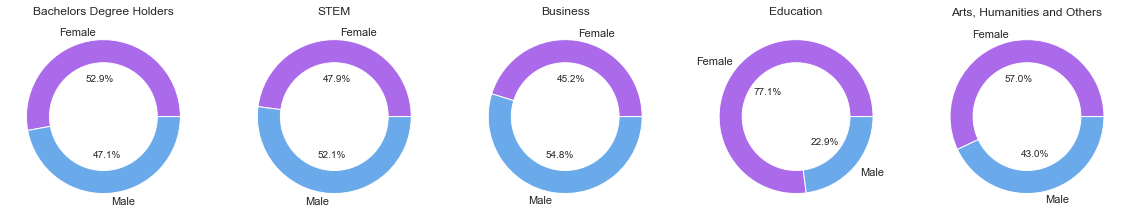

In [ ]:
columns = d5.columns[1:]

i=1
plt.figure(figsize=(20,10))

for col in columns:
        plt.subplot(1,5,i)
        plt.title(col)
        plt.pie(d5[col], labels=d5['Sex'], autopct='%.1f%%', colors=['#AA6AEA', '#6AAAEA'], pctdistance=0.5, labeldistance=1.1)

        my_circle=plt.Circle( (0,0), 0.7, color='white')
        p=plt.gcf()
        p.gca().add_artist(my_circle)
        i+=1

In [ ]:
d6 = df.groupby(['Sex', 'Age Group']).sum().reset_index()
d6

,Sex,Age Group,Bachelors Degree Holders,STEM,Business,Education,"Arts, Humanities and Others"
0,Female,25 to 39,13793883,6361465,2296595,1430716,3705107
1,Female,40 to 64,18147062,7321657,3814992,2778805,4231608
2,Female,65 and older,7458292,2464136,706630,2537817,1749709
3,Male,25 to 39,11321474,5768717,2516308,358696,2677753
4,Male,40 to 64,15786869,7822532,3979550,792112,3192675
5,Male,65 and older,7994071,3945469,1766633,851831,1430138


<AxesSubplot:xlabel='Age Group', ylabel='Bachelors Degree Holders'>

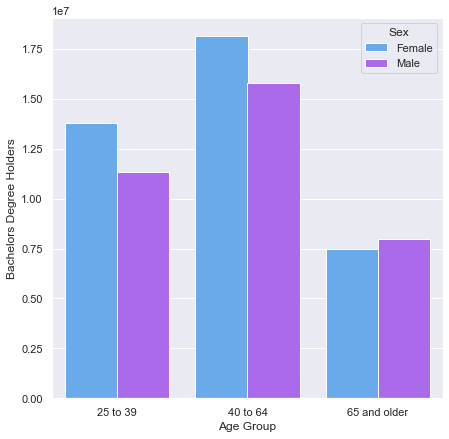

In [ ]:
plt.figure(figsize=(7,7))
sns.barplot(x = 'Age Group', y = 'Bachelors Degree Holders', hue = "Sex", data = d6, palette="cool")

In [ ]:
d7 = df.groupby(['Sex', 'Age Group']).sum().reset_index()
d7

,Sex,Age Group,Bachelors Degree Holders,STEM,Business,Education,"Arts, Humanities and Others"
0,Female,25 to 39,13793883,6361465,2296595,1430716,3705107
1,Female,40 to 64,18147062,7321657,3814992,2778805,4231608
2,Female,65 and older,7458292,2464136,706630,2537817,1749709
3,Male,25 to 39,11321474,5768717,2516308,358696,2677753
4,Male,40 to 64,15786869,7822532,3979550,792112,3192675
5,Male,65 and older,7994071,3945469,1766633,851831,1430138


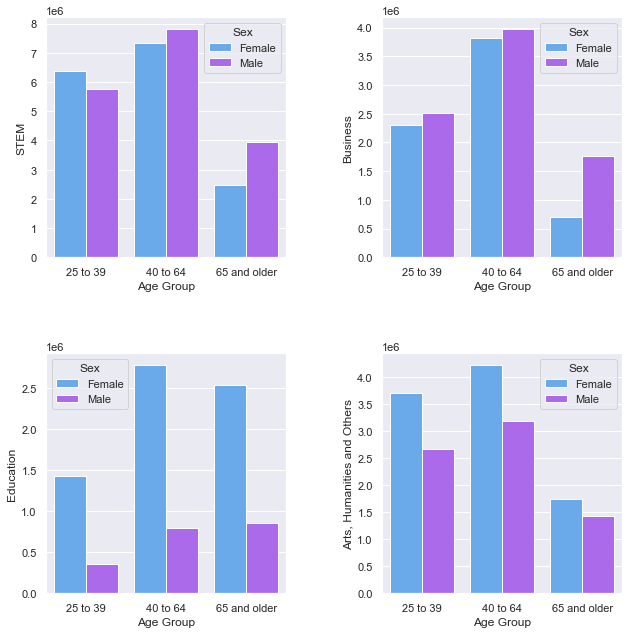

In [ ]:
columns = d7.columns[3:]

i=1
plt.figure(figsize=(10,10))

for col in columns:
        plt.subplot(2,2,i)
        sns.barplot(x = 'Age Group', y = col, hue = "Sex", data = d7, palette="cool")
        i+=1

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)